In [1]:
import pandas as pd
import sys
sys.path.append('/Users/mehdi/github/LSSutils')
import LSSutils.nn.nnutils as utils
import LSSutils.nn.ffnn as ffnn

# Auto MPG data

In [2]:
dataset_path = '/Users/mehdi/.keras/datasets/auto-mpg.data'

In [3]:
# read using pandas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
dataset = dataset.dropna()
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

In [5]:
dataset.shape

(392, 10)

In [6]:
t_dataset     = dataset.sample(frac=0.8,random_state=0)
test_dataset  = dataset.drop(t_dataset.index)
val_dataset   = t_dataset.sample(frac=0.25, random_state=0)
train_dataset = t_dataset.drop(val_dataset.index)
train_dataset.shape, val_dataset.shape, test_dataset.shape

((236, 10), (78, 10), (78, 10))

In [7]:
t_dataset.shape, dataset.shape

((314, 10), (392, 10))

In [8]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,236.0,5.487288,1.719676,3.0,4.00,4.0,8.00,8.0
Displacement,236.0,196.394068,106.850190,68.0,98.00,151.0,302.00,455.0
Horsepower,236.0,105.012712,38.877492,46.0,75.00,94.5,129.25,225.0
Weight,236.0,2971.919492,858.698202,1649.0,2220.00,2781.5,3564.75,5140.0
Acceleration,236.0,15.580932,2.806879,8.0,13.65,15.5,17.40,24.8
Model Year,236.0,75.906780,3.726814,70.0,73.00,76.0,79.00,82.0
USA,236.0,0.614407,0.487770,0.0,0.00,1.0,1.00,1.0
Europe,236.0,0.169492,0.375983,0.0,0.00,0.0,0.00,1.0
Japan,236.0,0.216102,0.412459,0.0,0.00,0.0,0.00,1.0


In [9]:
train_labels = train_dataset.pop('MPG')
test_labels  = test_dataset.pop('MPG')
val_labels   = val_dataset.pop('MPG')

In [10]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data  = norm(test_dataset)
normed_val_data  = norm(val_dataset)

In [11]:
import numpy as np

In [12]:
class DATA(object):    
    def __init__(self, x, y, w=1.0):
        self.X = x
        self.Y = y
        self.W = w*np.ones_like(y)

In [13]:
train = DATA(normed_train_data, train_labels)
test  = DATA(normed_test_data, test_labels)
val   = DATA(normed_val_data, val_labels)

In [14]:
kw = dict(nfeature=9)
model0 = ffnn.run_model(9, train,  val,  test, units=[0], batch_size=20)
model1 = ffnn.run_model(9, train,  val,  test, units=[10, 10], batch_size=20)
model2 = ffnn.run_model(9, train,  val,  test, units=[50, 50], batch_size=20)
model3 = ffnn.run_model(9, train,  val,  test, units=[100, 100], batch_size=20)

run linear model

....................................................................................................done in 1.8 secs
run with two hidden layer

....................................................................................................done in 2.1 secs
run with two hidden layer

............................................................................done in 1.9 secs
run with two hidden layer

...............................................done in 1.3 secs


In [15]:
import matplotlib.pyplot as plt

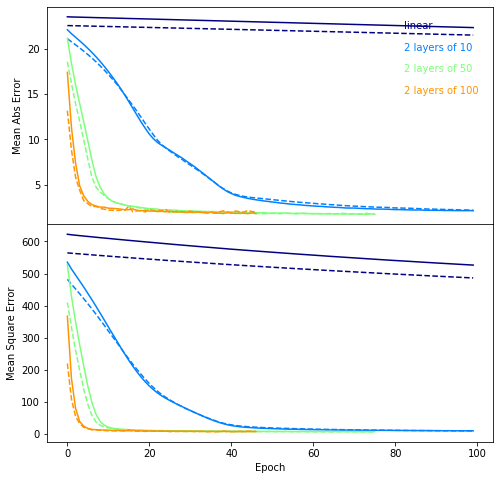

In [16]:
utils.plot_history([model0['history'], 
                    model1['history'], 
                    model2['history'], 
                    model3['history']],
                  ['linear', 
                   '2 layers of 10',
                   '2 layers of 50',
                  '2 layers of 100'])
plt.show()

In [17]:
import pandas as pd

In [18]:
pd.DataFrame(model0['history'].history).tail().T

,95,96,97,98,99
loss,529.208190,528.481274,527.750163,527.020485,526.304544
mae,22.400127,22.388578,22.375788,22.365242,22.352518
mse,529.208191,528.481262,527.750244,527.020508,526.304504
val_loss,488.643919,488.030791,487.402264,486.803816,486.185337
val_mae,21.566868,21.555779,21.544725,21.533833,21.522823
val_mse,488.643921,488.030762,487.402252,486.803772,486.185333


In [19]:
pd.DataFrame(model0['history'].history).tail().T

,95,96,97,98,99
loss,529.208190,528.481274,527.750163,527.020485,526.304544
mae,22.400127,22.388578,22.375788,22.365242,22.352518
mse,529.208191,528.481262,527.750244,527.020508,526.304504
val_loss,488.643919,488.030791,487.402264,486.803816,486.185337
val_mae,21.566868,21.555779,21.544725,21.533833,21.522823
val_mse,488.643921,488.030762,487.402252,486.803772,486.185333


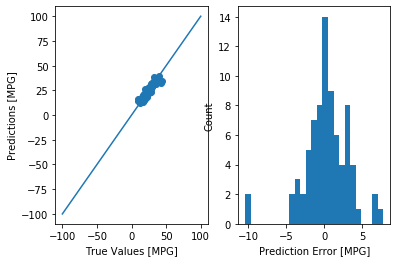

In [21]:
utils.plot_prederr(test.Y, model1['Ypred'].flatten())

In [22]:
model2['history'].model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 9),
    'dtype': 'float32',
    'units': 50,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'truncated_normal',
      'seed': 123456}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L1L2',
     'config': {'l1': 0.0, 'l2': 0.0}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 50,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution

In [23]:
sys.path.append('/Users/mehdi/github/SYSNet/src')
import NN

In [24]:
help(NN.Netregression)

Help on class Netregression in module NN:

class Netregression(builtins.object)
 |  Netregression(train, valid, test, axfit=None)
 |  
 |  class for a general regression
 |  
 |  Methods defined here:
 |  
 |  __init__(self, train, valid, test, axfit=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  savez(self, indir='./', name='regression_2hl_5chain_10epoch')
 |  
 |  train_evaluate(self, learning_rate=0.001, batchsize=100, nepoch=10, nchain=5, Units=[10, 10], tol=1e-05, scale=0.0, actfunc=<function relu at 0x12d9c4bf8>, patience=10)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [25]:
NN.Netregression?